In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')
df.head()


Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:

df.info()


data = df.drop(['CustomerID', 'Genre'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


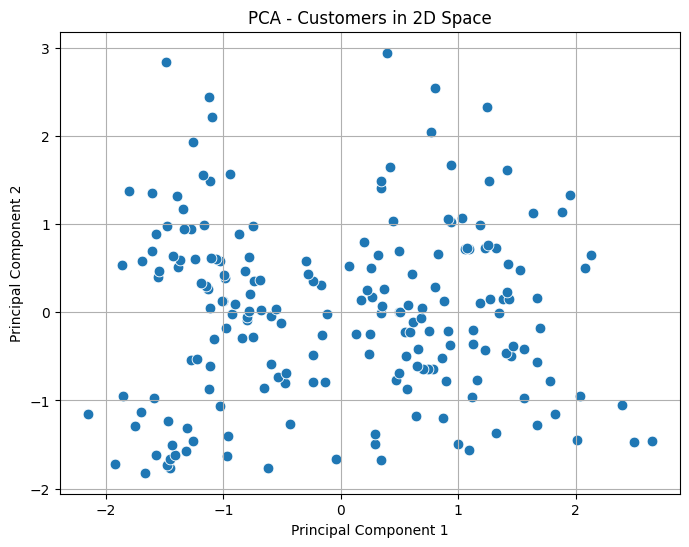

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=60)
plt.title('PCA - Customers in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


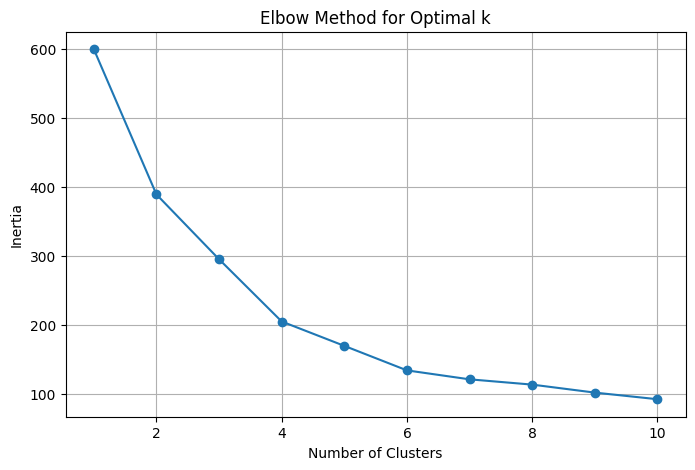

In [19]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


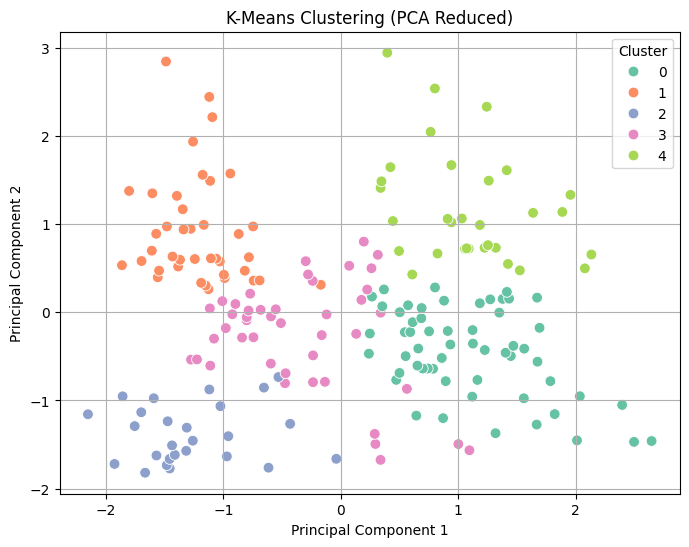

In [20]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

df['KMeans_Cluster'] = kmeans.labels_


df.head()


pca_df['KMeans_Cluster'] = kmeans.labels_


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set2', s=60)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


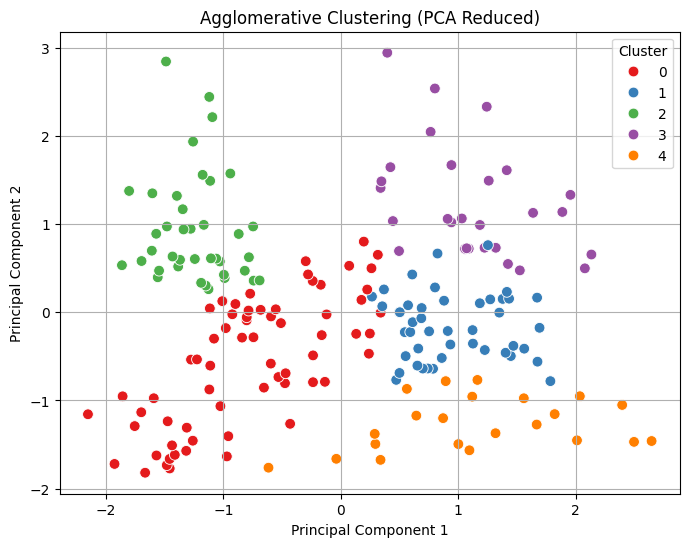

In [22]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(scaled_df)

df['Agglomerative_Cluster'] = agglo_labels
pca_df['Agglomerative_Cluster'] = agglo_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Agglomerative_Cluster', palette='Set1', s=60)
plt.title('Agglomerative Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


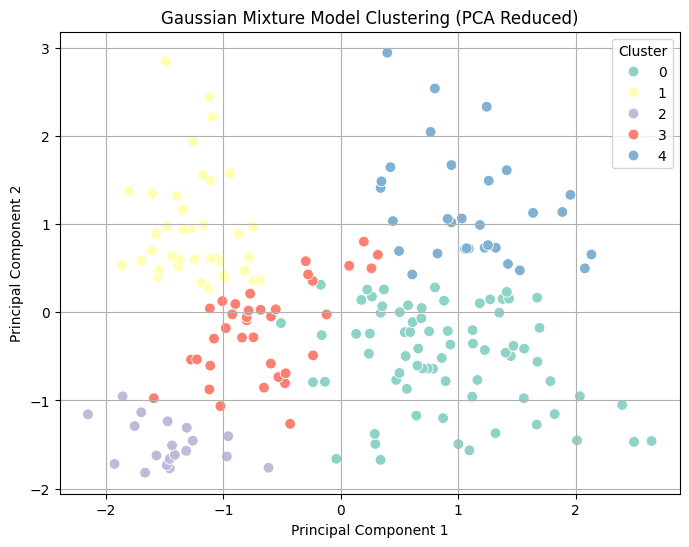

In [23]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

df['GMM_Cluster'] = gmm_labels
pca_df['GMM_Cluster'] = gmm_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='GMM_Cluster', palette='Set3', s=60)
plt.title('Gaussian Mixture Model Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()




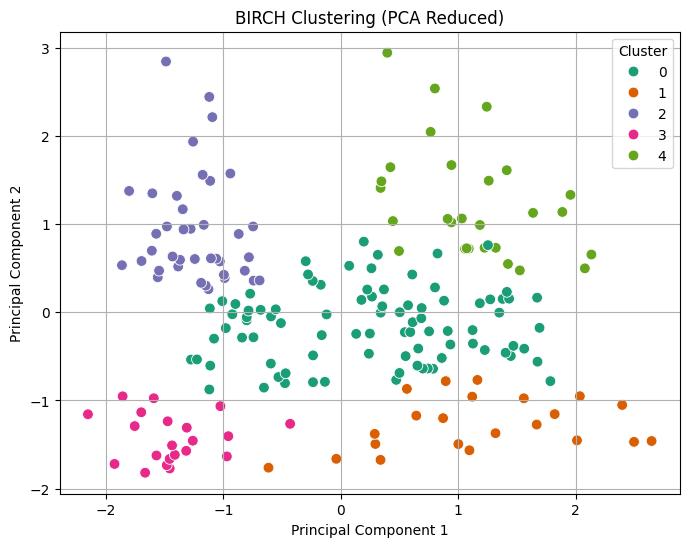

In [24]:
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(scaled_df)

df['BIRCH_Cluster'] = birch_labels
pca_df['BIRCH_Cluster'] = birch_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='BIRCH_Cluster', palette='Dark2', s=60)
plt.title('BIRCH Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



In [25]:

# KMeans evaluation
kmeans_silhouette = silhouette_score(scaled_df, df['KMeans_Cluster'])
kmeans_db = davies_bouldin_score(scaled_df, df['KMeans_Cluster'])

# Agglomerative evaluation
agglo_silhouette = silhouette_score(scaled_df, df['Agglomerative_Cluster'])
agglo_db = davies_bouldin_score(scaled_df, df['Agglomerative_Cluster'])

# GMM evaluation
gmm_silhouette = silhouette_score(scaled_df, df['GMM_Cluster'])
gmm_db = davies_bouldin_score(scaled_df, df['GMM_Cluster'])

# BIRCH evaluation
birch_silhouette = silhouette_score(scaled_df, df['BIRCH_Cluster'])
birch_db = davies_bouldin_score(scaled_df, df['BIRCH_Cluster'])

# Results
results = {
    'KMeans': {'Silhouette Score': kmeans_silhouette, 'Davies-Bouldin Index': kmeans_db},
    'Agglomerative': {'Silhouette Score': agglo_silhouette, 'Davies-Bouldin Index': agglo_db},
    'GMM': {'Silhouette Score': gmm_silhouette, 'Davies-Bouldin Index': gmm_db},
    'BIRCH': {'Silhouette Score': birch_silhouette, 'Davies-Bouldin Index': birch_db},
}

results_df = pd.DataFrame(results).T
results_df


,Silhouette Score,Davies-Bouldin Index
KMeans,0.408469,0.888969
Agglomerative,0.390028,0.916289
GMM,0.376441,0.890168
BIRCH,0.323102,1.150724


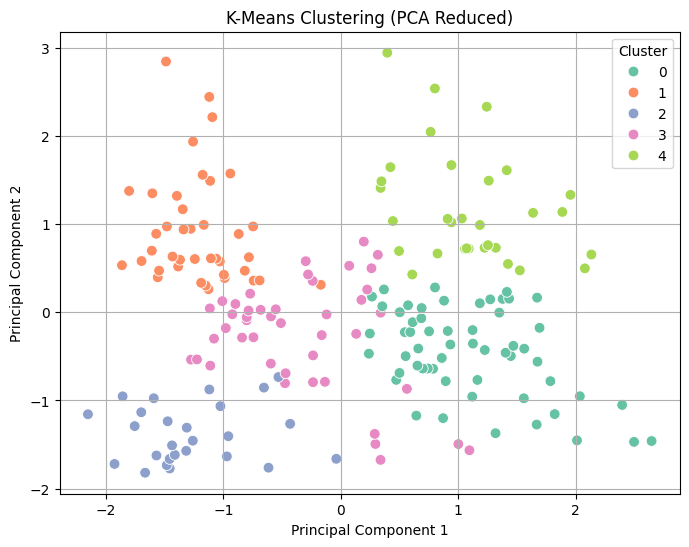

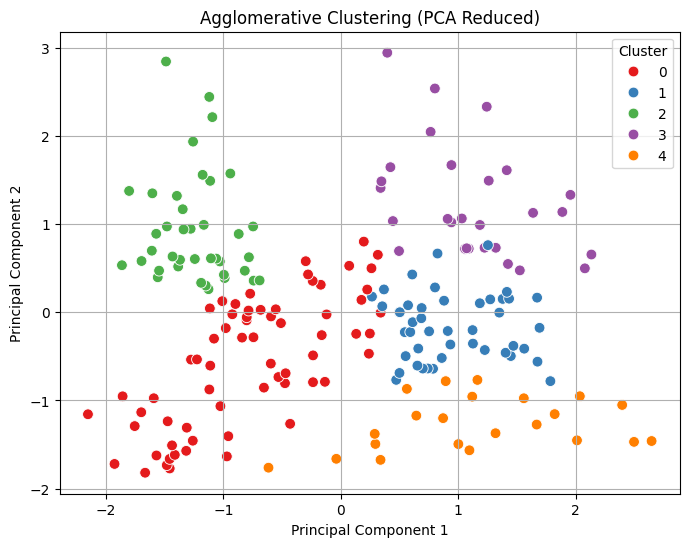

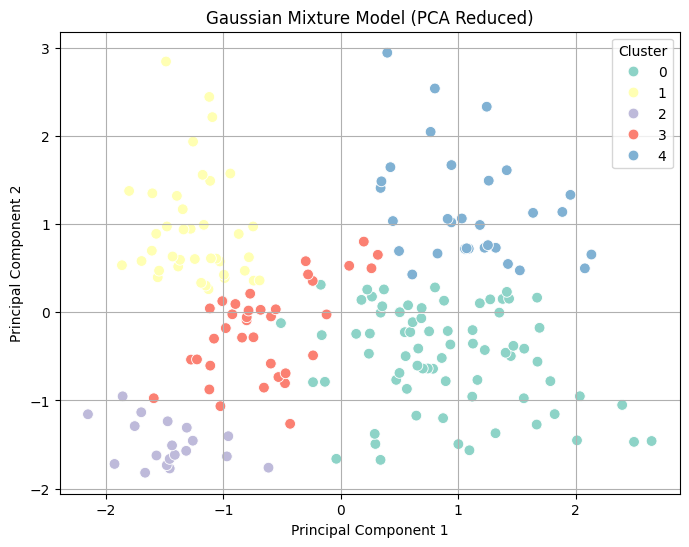

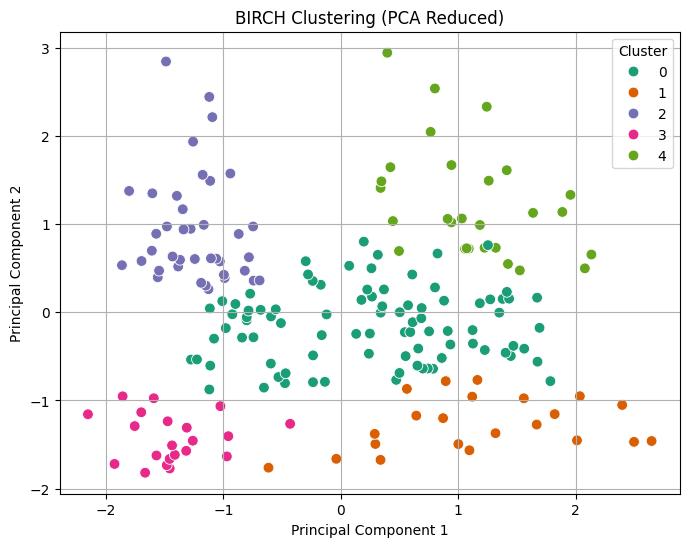

In [26]:
# KMeans Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set2', s=60)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Agglomerative Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Agglomerative_Cluster', palette='Set1', s=60)
plt.title('Agglomerative Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# GMM Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='GMM_Cluster', palette='Set3', s=60)
plt.title('Gaussian Mixture Model (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# BIRCH Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='BIRCH_Cluster', palette='Dark2', s=60)
plt.title('BIRCH Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
